In [1]:
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [2]:
# !pip install mlflow
path = r"C://Users//User//Downloads//"
train = pd.read_csv(path + "train.csv")
val=pd.read_csv(path + "validation.csv")
test=pd.read_csv(path + "test.csv")

In [8]:
y_train,X_train=train["Label"],train["Text"]
y_val,X_val=val["Label"],val["Text"]
y_test,X_test=test["Label"],test["Text"]

In [9]:
# transform the text data to feature vectors that can be used as input for the models
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
X_val_features = feature_extraction.transform(X_val)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
y_val = y_val.astype('int')

# 1.1 Naive Bayes


In [10]:
modelbnb = BernoulliNB()
modelbnb.fit(X_train_features.toarray() , y_train)

BernoulliNB()

In [11]:
# prediction on training data

prediction_on_training_data = modelbnb.predict(X_train_features.toarray())
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [12]:
print('Accuracy on training data : ', round(accuracy_on_training_data * 100,3), "%")

Accuracy on training data :  98.744 %


In [13]:
# prediction on Validation data

prediction_on_val_data = modelbnb.predict(X_val_features.toarray())
accuracy_on_val_data = accuracy_score(y_val, prediction_on_val_data)

In [14]:
print('Accuracy on Validation data : ', round(accuracy_on_val_data * 100,3), "%")

Accuracy on Validation data :  97.129 %


In [15]:
# prediction on test data
y_pred = modelbnb.predict(X_test_features.toarray())
accuracy_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

In [16]:
print('Accuracy on test data : ', accuracy_on_test_data, "%")

Accuracy on test data :  97.608 %


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       726
           1       1.00      0.82      0.90       110

    accuracy                           0.98       836
   macro avg       0.99      0.91      0.94       836
weighted avg       0.98      0.98      0.98       836



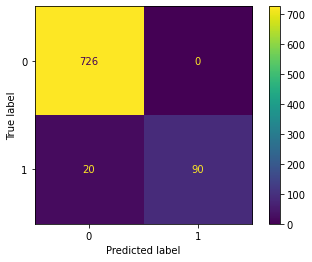

In [18]:
cm = confusion_matrix(y_test, y_pred, labels=modelbnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelbnb.classes_)
disp.plot()
plt.show()

In [19]:
def eval_metrics(actual, pred):
    prec, recall,_ = precision_recall_curve(actual, pred)
    aucpr = auc(recall, prec)
    return aucpr

In [21]:
  with mlflow.start_run():
        lr = BernoulliNB()
        lr.fit(X_train_features, y_train)

        predicted_qualities = lr.predict(X_test_features)

        aucpr = eval_metrics(y_test, predicted_qualities)

        print("Bernoulli Naive Bayes model (Area under Precision_Recall Curve={:f}):".format(aucpr))
      
        mlflow.log_param("Area under Precision Recall Curve", aucpr)
        

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(lr, "model", registered_model_name="Naive Bayes Bernoulli")
        else:
            mlflow.sklearn.log_model(lr, "model")

Bernoulli Naive Bayes model (Area under Precision_Recall Curve=0.921053):


# 1.2 Gaussian Naive Bayes

In [22]:
modelgnb = GaussianNB()
modelgnb.fit(X_train_features.toarray() , y_train)

GaussianNB()

In [23]:
prediction_on_training_data = modelgnb.predict(X_train_features.toarray())
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [24]:
print('Accuracy on training data : ', round(accuracy_on_training_data * 100,3), "%")

Accuracy on training data :  94.231 %


In [25]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# cv_method = RepeatedStratifiedKFold(n_splits=50,  n_repeats=3, random_state=999)

# from sklearn.preprocessing import PowerTransformer
# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
# gs_NB = GridSearchCV(estimator=modelgnb, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')


In [26]:
# prediction on Validation data

prediction_on_val_data = modelgnb.predict(X_val_features.toarray())
# pred_on_val_data = gs_NB.fit(X_val_features.toarray(), y_val)
accuracy_on_val_data = accuracy_score(y_val, prediction_on_val_data)

In [27]:
print('Accuracy on Validation data : ', round(accuracy_on_val_data * 100,3), "%")

Accuracy on Validation data :  89.234 %


In [28]:
# prediction on test data
y_pred = modelgnb.predict(X_test_features.toarray())
accuracy_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

In [29]:
print('Accuracy on test data : ', accuracy_on_test_data, "%")

Accuracy on test data :  88.995 %


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       726
           1       0.55      0.89      0.68       110

    accuracy                           0.89       836
   macro avg       0.77      0.89      0.81       836
weighted avg       0.93      0.89      0.90       836



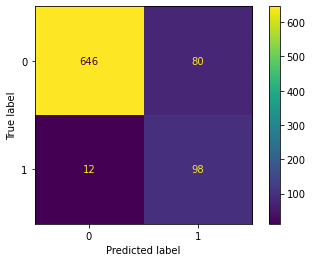

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=modelgnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelgnb.classes_)
disp.plot()
plt.show()

In [35]:
  with mlflow.start_run():
        lr = GaussianNB()
        lr.fit(X_train_features.toarray(), y_train)

        predicted_qualities = lr.predict(X_test_features.toarray())

        aucpr = eval_metrics(y_test, predicted_qualities)

        print("Gaussian Naive Bayes model (Area under Precision_Recall Curve={:f}):".format(aucpr))
      
        mlflow.log_param("Area under Precision Recall Curve", aucpr)
        

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(lr, "modelgnb", registered_model_name="Gaussian Bayes Bernoulli")
        else:
            mlflow.sklearn.log_model(lr, "modelgnb")

Gaussian Naive Bayes model (Area under Precision_Recall Curve=0.727912):


# 2. Logistic Regression

In [36]:
modellr = LogisticRegression()

In [37]:
# training the Logistic Regression model with the training data
modellr.fit(X_train_features, y_train)

LogisticRegression()

In [38]:
# prediction on training data
prediction_on_training_data = modellr.predict(X_train_features)
accuracy_on_training_data = round(accuracy_score(y_train, prediction_on_training_data) * 100,3)

In [39]:
print('Accuracy on training data : ', accuracy_on_training_data, "%")

Accuracy on training data :  96.795 %


In [40]:
# prediction on Validation data

prediction_on_val_data = modellr.predict(X_val_features.toarray())
accuracy_on_val_data = accuracy_score(y_val, prediction_on_val_data)

In [41]:
print('Accuracy on Validation data : ', round(accuracy_on_val_data * 100,3), "%")

Accuracy on Validation data :  96.053 %


In [42]:
# prediction on test data
y_pred = modellr.predict(X_test_features)
accuracy_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

In [43]:
print('Accuracy on test data : ', accuracy_on_test_data, "%")

Accuracy on test data :  95.455 %


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       726
           1       0.97      0.67      0.80       110

    accuracy                           0.95       836
   macro avg       0.96      0.83      0.89       836
weighted avg       0.96      0.95      0.95       836



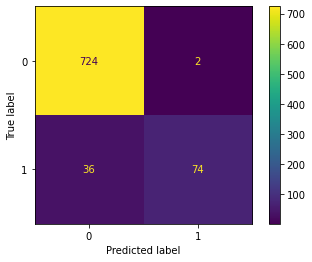

In [45]:
cm = confusion_matrix(y_test, y_pred, labels=modellr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modellr.classes_)
disp.plot()
plt.show()

In [46]:
  with mlflow.start_run():
        lr = LogisticRegression()
        lr.fit(X_train_features, y_train)
        predicted_qualities = lr.predict(X_test_features)
        aucpr = eval_metrics(y_test, predicted_qualities)

        print("Logistic Regression model (Area under Precision_Recall Curve={:f}):".format(aucpr))
      
        mlflow.log_param("Area under Precision Recall Curve", aucpr)
        

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(lr, "model", registered_model_name="Logistic Regression")
        else:
            mlflow.sklearn.log_model(lr, "model")

Logistic Regression model (Area under Precision_Recall Curve=0.844737):


# 3. MLP Classifier

In [47]:
modelmlp = MLPClassifier()
modelmlp.fit(X_train_features, y_train)

MLPClassifier()

In [48]:
# prediction on training data
prediction_on_training_data = modelmlp.predict(X_train_features)
accuracy_on_training_data = round(accuracy_score(y_train, prediction_on_training_data) * 100, 3)

In [49]:
print('Accuracy on training data : ', accuracy_on_training_data, "%")

Accuracy on training data :  100.0 %


In [50]:
# prediction on Validation data

prediction_on_val_data = modelmlp.predict(X_val_features.toarray())
accuracy_on_val_data = accuracy_score(y_val, prediction_on_val_data)

In [51]:
print('Accuracy on Validation data : ', round(accuracy_on_val_data * 100,3), "%")

Accuracy on Validation data :  99.163 %


In [52]:
# prediction on test data
y_pred = modelmlp.predict(X_test_features)
accuracy_on_test_data = round(accuracy_score(y_test, y_pred) * 100,3)

In [53]:
print('Accuracy on test data : ', accuracy_on_test_data, "%")

Accuracy on test data :  99.043 %


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       726
           1       0.99      0.94      0.96       110

    accuracy                           0.99       836
   macro avg       0.99      0.97      0.98       836
weighted avg       0.99      0.99      0.99       836



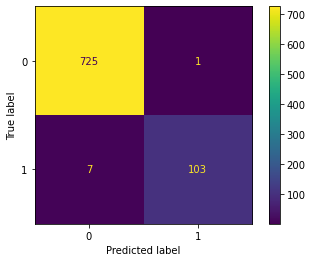

In [55]:
cm = confusion_matrix(y_test, y_pred, labels=modelmlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelmlp.classes_)
disp.plot()
plt.show()

In [56]:
  with mlflow.start_run():
        lr = MLPClassifier()
        lr.fit(X_train_features, y_train)
        predicted_qualities = lr.predict(X_test_features)
        aucpr = eval_metrics(y_test, predicted_qualities)

        print("MLP model (Area under Precision_Recall Curve={:f}):".format(aucpr))
      
        mlflow.log_param("Area under Precision Recall Curve", aucpr)
        

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(lr, "model", registered_model_name="Multilayer Perceptron Model")
        else:
            mlflow.sklearn.log_model(lr, "model")

MLP model (Area under Precision_Recall Curve=0.967561):


**In terms of accuracy, F1 score and precision values, the Multi Layer perceptron is the best performing one, since for this specific task, we have to maximise precision.**


**Bernoulli Naive Bayes is also performing well for this model.**